# DCT and IDCT

Date: 2023/10/14

In [1]:
%matplotlib inline
%run ./zigzag.py

DATA_FOLDER = '../python/ThermographyGUI/data/'
SCREENSHOTS_FOLDER = '../python/ThermographyGUI/screenshots/'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import glob

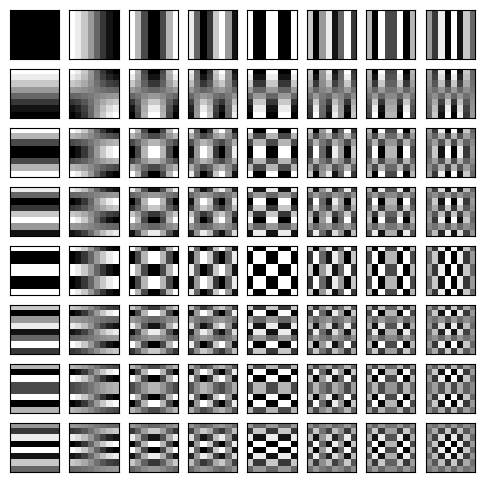

In [3]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
patterns = np.zeros([8,8,8,8])
for x in range(8):
    for y in range(8):
        dcted = np.zeros([8,8])
        dcted[x,y] = 1
        img = idct(idct(dcted, norm='ortho').T, norm='ortho').T
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        axes[x,y].imshow(img, cmap='gray')
        patterns[x,y,:,:] = img

In [4]:
data_files = glob.glob(DATA_FOLDER+'*.csv')
len(data_files)

420

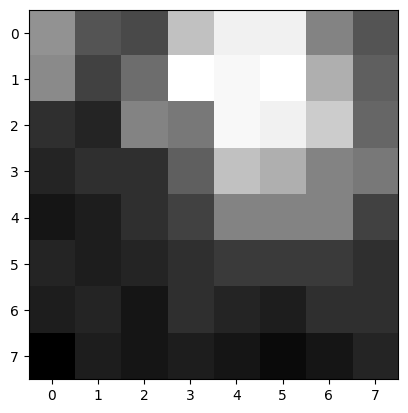

In [5]:
with open(data_files[20]) as f:
    data = np.array(f.read().split(',')).astype(float).reshape(8,8)
plt.imshow(data, cmap='gray')

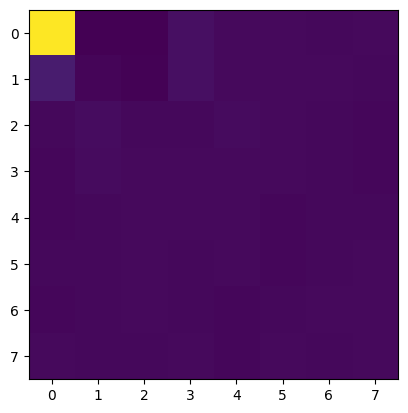

In [6]:
dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
plt.imshow(dcted_data, cmap='viridis')

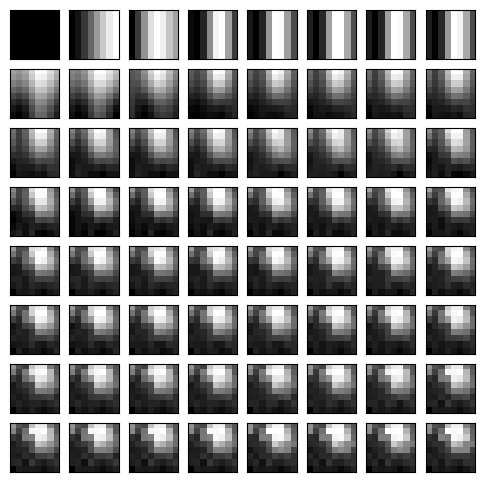

In [7]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
idcted_data = np.zeros([8,8])

for x in range(8):
    for y in range(8):
        idcted_data += dcted_data[x,y] * patterns[x,y]
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        axes[x,y].imshow(idcted_data, cmap='gray')

In [8]:
ZIGZAG = [[0,0], [1,0], [0,1], [0,2], [1,1], [2,0], [3,0], [2,1], [1,2], [0,3], [0,4], [1,3], [2,2], [3,1], [4,0], [5,0], [4,1], [3,2], [2,3], [1,4], [0,5]]

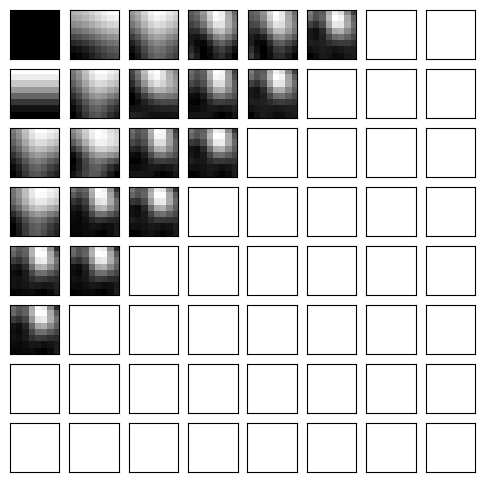

In [9]:
idcted_data = np.zeros([8,8])

fig, axes = plt.subplots(8,8, figsize=(6,6))
for x, y in ZIGZAG:
    idcted_data += dcted_data[x, y] * patterns[x, y]
    axes[x, y].imshow(idcted_data, cmap='gray')
for x in range(8):
    for y in range(8):
        axes[x, y].set_xticks([])
        axes[x, y].set_yticks([])

../python/ThermographyGUI/data/scissors-20190106130548.csv


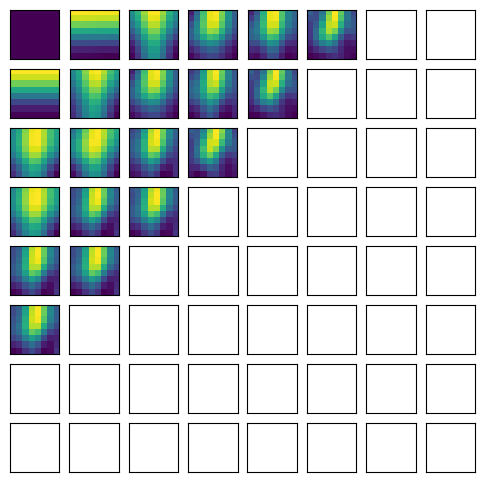

../python/ThermographyGUI/data/scissors-20190106130601.csv


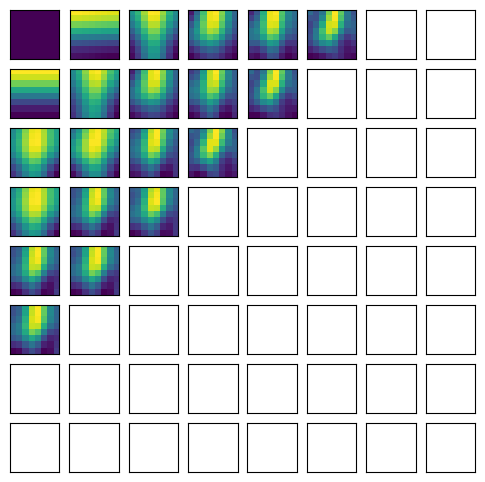

../python/ThermographyGUI/data/scissors-20230914123001.csv


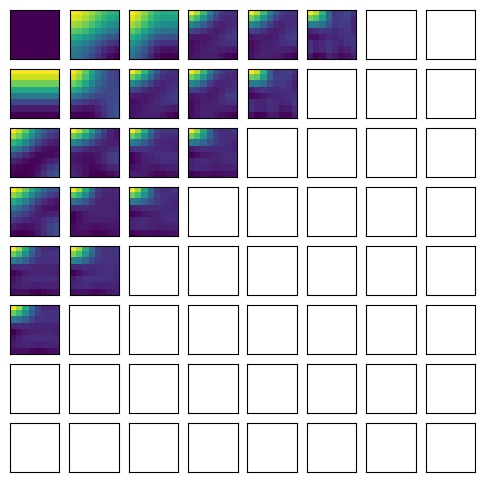

../python/ThermographyGUI/data/rock-20230914121744.csv


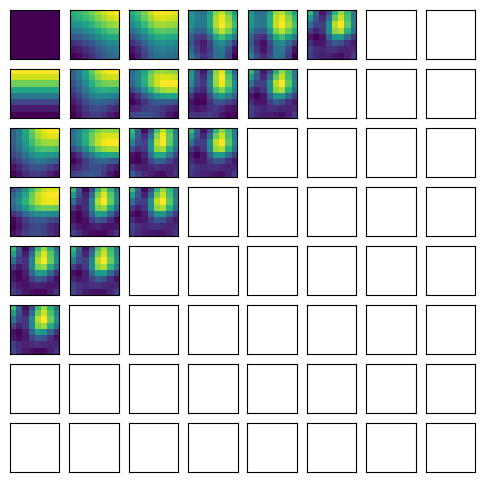

../python/ThermographyGUI/data/paper-20230914122601.csv


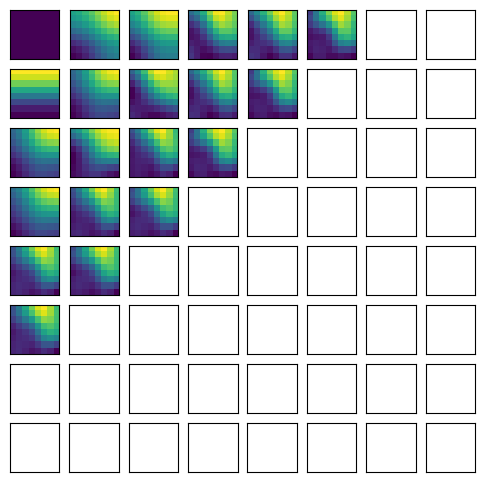

../python/ThermographyGUI/data/scissors-20190104211734.csv


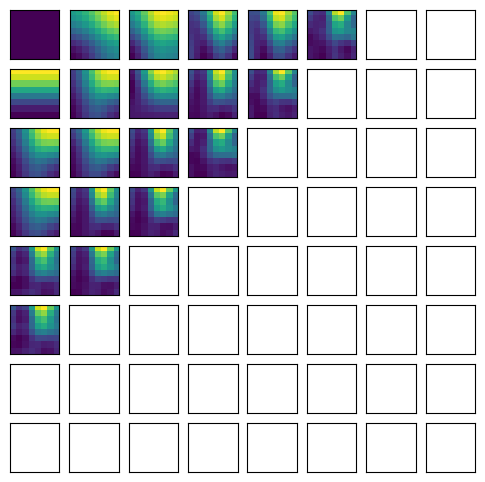

../python/ThermographyGUI/data/scissors-20230914124452.csv


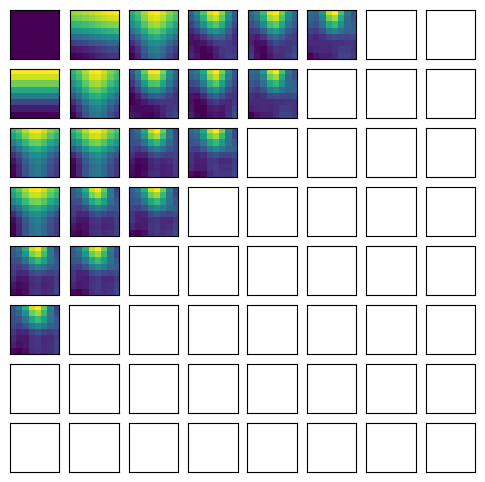

../python/ThermographyGUI/data/scissors-20190104211732.csv


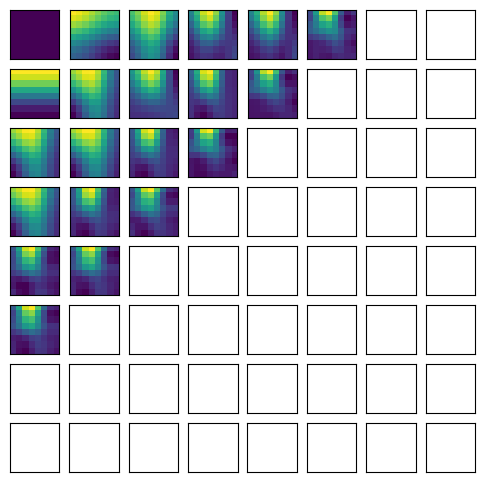

../python/ThermographyGUI/data/rock-20190104211316.csv


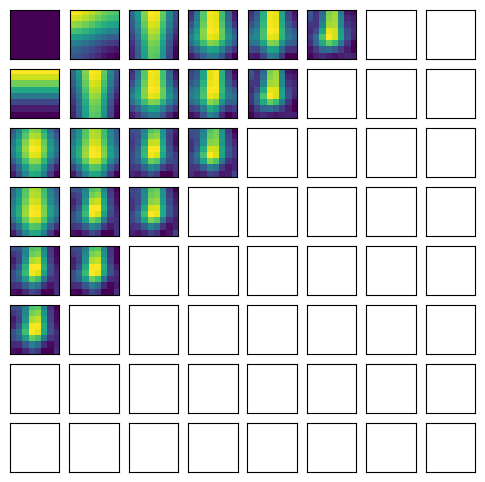

../python/ThermographyGUI/data/paper-20230914121944.csv


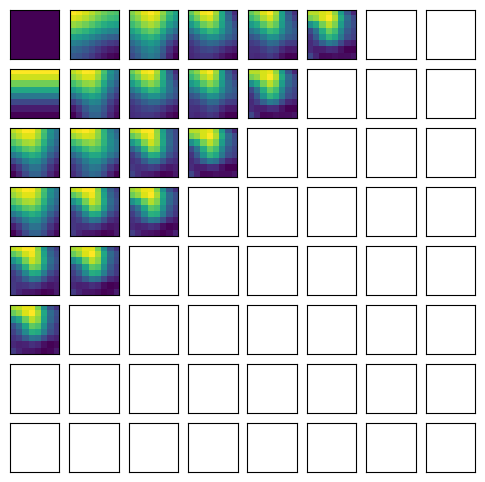

../python/ThermographyGUI/data/scissors-20190104211714.csv


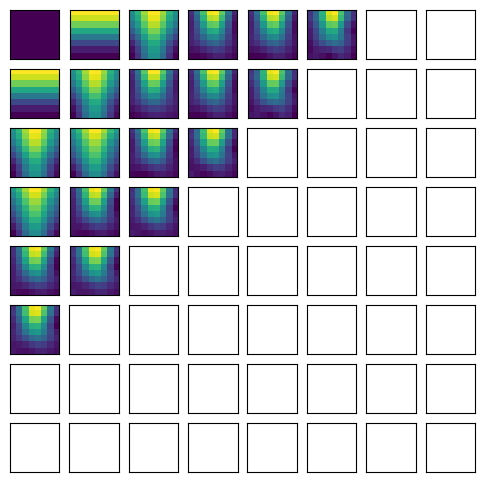

../python/ThermographyGUI/data/scissors-20230914120827.csv


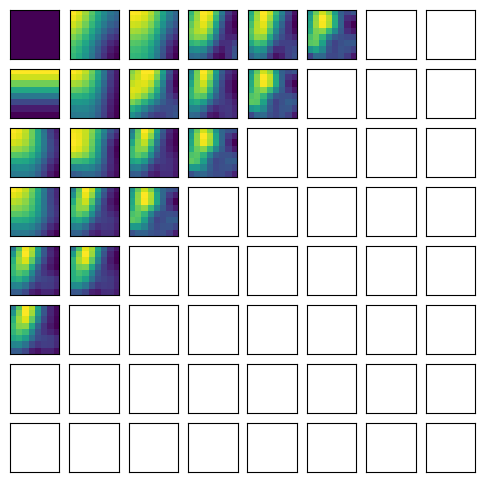

../python/ThermographyGUI/data/paper-20190106130404.csv


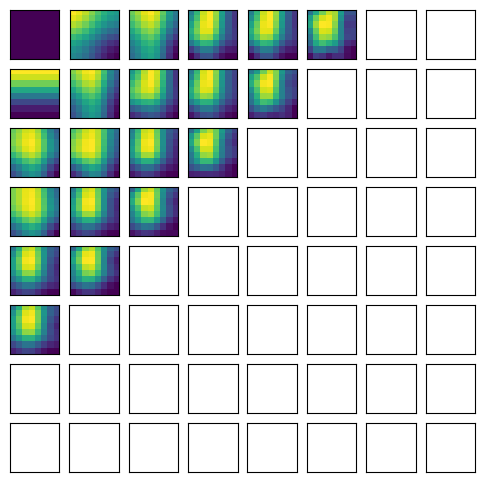

../python/ThermographyGUI/data/scissors-20230914120404.csv


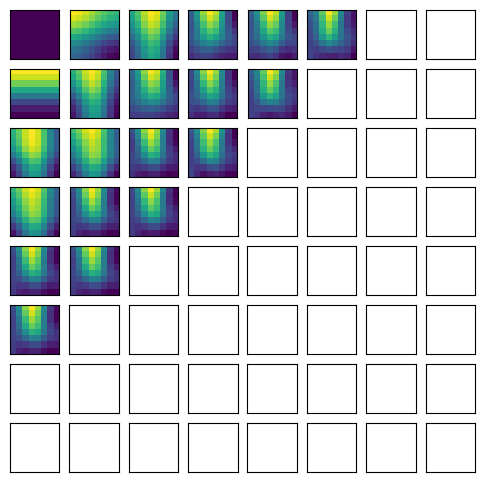

../python/ThermographyGUI/data/scissors-20230914120258.csv


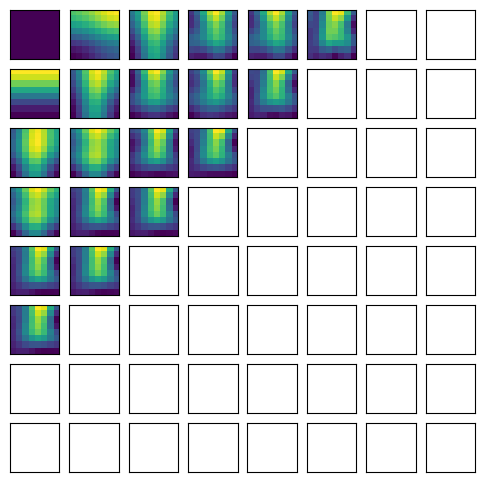

../python/ThermographyGUI/data/paper-20230914123713.csv


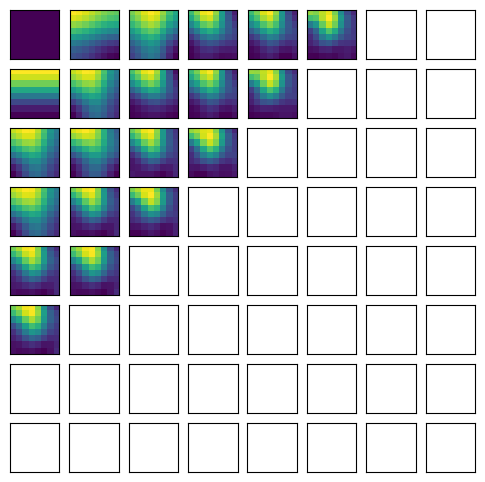

../python/ThermographyGUI/data/paper-20230914122540.csv


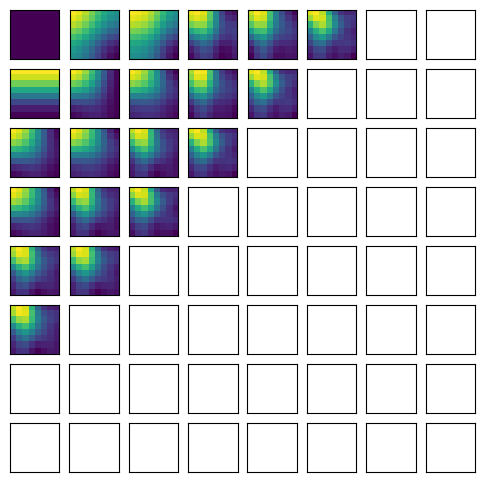

../python/ThermographyGUI/data/paper-20190104211519.csv


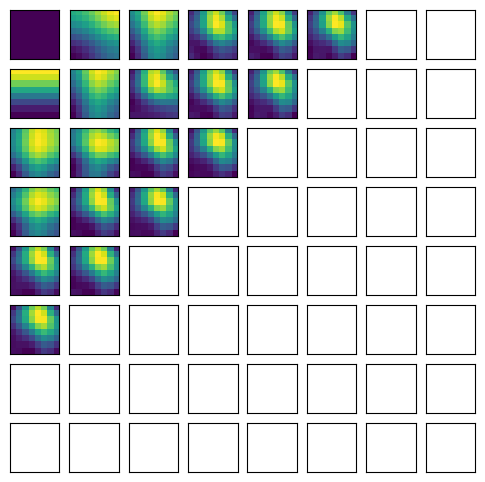

In [10]:
for i in range(8, len(data_files), 24):
    with open(data_files[i]) as f:
        print(data_files[i])
        data = np.array(f.read().split(',')).astype(float).reshape(8,8)
        dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
        idcted_data = np.zeros([8,8])

        fig, axes = plt.subplots(8,8, figsize=(6,6))
        for x, y in ZIGZAG:
            idcted_data += dcted_data[x, y] * patterns[x, y]
            axes[x, y].imshow(idcted_data, cmap='viridis')
        for x in range(8):
            for y in range(8):
                axes[x, y].set_xticks([])
                axes[x, y].set_yticks([])
        plt.show()

## Conclusion

My neural network model does not see gaps between fingers. 